# Третья неделя


#### Выполнил Ким Антон 
#### В рамках курса "Введение в машинное обучение" от Высшей школы экономики

## I. Опорные объекты

### Введение
Метод опорных векторов (Support Vector Machine, SVM) — один из видов линейных классификаторов. Функционал, который он оптимизирует, направлен на максимизацию ширины разделяющей полосы между классами. Из теории статистического обучения известно, что эта ширина тесно связана с обобщающей способностью алгоритма, а ее максимизация позволяет бороться с переобучением.

Метод опорных векторов имеет еще одну особенность. Если преобразовать его оптимизационную задачу, то окажется, что итоговый классификатор можно представить как взвешенную сумму скалярных произведений данного объекта на объекты обучающей выборки:
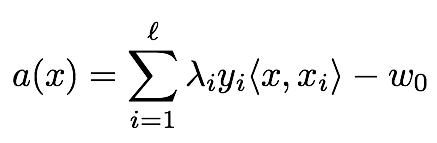

По сути, алгоритм делает предсказания на основе сходства нового объекта с объектами обучающей выборки. При этом, как правило, далеко не все коэффициенты оказываются ненулевыми. Это означает, что классификация делается на основе сходства лишь с частью обучающих объектов. Такие объекты называются <b>опорными</b>.

### План работы
<ul>
 <li>работать с методом опорных векторов (SVM)</li>
 <li>находить наиболее важные объекты выборки</li>
</ul>

### Подключение библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVC

### Загрузка данных 

In [2]:
data = pd.read_csv('data/week_3_svm-data.csv', header=None)

In [3]:
data.head()

,0,1,2
0,0.0,0.70,0.29
1,1.0,0.23,0.55
2,0.0,0.72,0.42
3,0.0,0.98,0.68
4,0.0,0.48,0.39


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10 non-null     float64
 1   1       10 non-null     float64
 2   2       10 non-null     float64
dtypes: float64(3)
memory usage: 304.0 bytes


### Описание данных

<ul>
    <li><b>0</b> - целевая</li>
    <li><b>1</b> - признак</li>
    <li><b>2</b> - признак</li>
</ul>


### Инструкции по выполнению
Метод опорных векторов реализован в классе `sklearn.svm.SVC`.

Основными параметрами этого класса являются коэффициент С и тип ядра *kernel*. В данной задаче мы будем использовать линейное ядро — для этого нужно задать значение параметра *kernel='linear'*
Индексы опорных объектов обученного классификатора хранятся в поле *support_*

#### 1. Извлеките из данных признаки и классы. Класс записан в первом столбце

In [5]:
y = data[0]
X = data.drop(0, axis=1)

#### 2. Обучите классификатор с линейным ядром, параметром C = 100000 и random_state=241. 
Такое значение параметра нужно использовать, чтобы убедиться, что SVM работает с выборкой как с линейно разделимой. При более низких значениях параметра алгоритм будет настраиваться с учетом слагаемого в функционале, штрафующего за маленькие отступы, из-за чего результат может не совпасть с решением классической задачи SVM для линейно разделимой выборки.

In [6]:
model = SVC(C=100000, kernel='linear', random_state=241)

model.fit(X, y)

SVC(C=100000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=241, shrinking=True, tol=0.001,
    verbose=False)

#### 3. Найдите номера объектов, которые являются опорными (нумерация с единицы). 

In [7]:
model.support_

array([3, 4, 9])

После обучения модели, опорными объектами стали данные под номером: 3, 4, 9

## II. Анализ текстов

### Введение
Метод опорных векторов (Support Vector Machine, SVM) — один из видов линейных классификаторов. Функционал, который он оптимизирует, направлен на максимизацию ширины разделяющей полосы между классами. Из теории статистического обучения известно, что эта ширина тесно связана с обобщающей способностью алгоритма, а ее максимизация позволяет бороться с переобучением.

Одна из причин популярности линейных методов заключается в том, что они хорошо работают на разреженных данных. Так называются выборки с большим количеством признаков, где на каждом объекте большинство признаков равны нулю. Разреженные данные возникают, например, при работе с текстами. Дело в том, что текст удобно кодировать с помощью "мешка слов" — формируется столько признаков, сколько всего уникальных слов встречается в текстах, и значение каждого признака равно числу вхождений в документ соответствующего слова. Ясно, что общее число различных слов в наборе текстов может достигать десятков тысяч, и при этом лишь небольшая их часть будет встречаться в одном конкретном тексте.

Можно кодировать тексты хитрее, и записывать не количество вхождений слова в текст, а TF-IDF. Это показатель, который равен произведению двух чисел: TF (term frequency) и IDF (inverse document frequency). Первая равна отношению числа вхождений слова в документ к общей длине документа. Вторая величина зависит от того, в скольки документах выборки встречается это слово. Чем больше таких документов, тем меньше IDF. Таким образом, TF-IDF будет иметь высокое значение для тех слов, которые много раз встречаются в данном документе, и редко встречаются в остальных.

### План работы
<ul>
    <li>находить оптимальные параметры для метода опорных векторов</li>
    <li>работать с текстовыми данными</li>
</ul>

### Подключение библиотек

In [8]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, KFold

### Загрузка данных 

In [9]:
data = fetch_20newsgroups(
                    subset='all', 
                    categories=['alt.atheism', 'sci.space']
             )

### Описание данных
Набор текстов с классами




### Инструкции по выполнению
Одна из сложностей работы с текстовыми данными состоит в том, что для них нужно построить числовое представление. Одним из способов нахождения такого представления является вычисление *TF-IDF*. В Scikit-Learn это реализовано в классе `sklearn.feature_extraction.text.TfidfVectorizer`. Преобразование обучающей выборки нужно делать с помощью функции *fit_transform*, тестовой — с помощью *transform*.

Реализация SVM-классификатора находится в классе sklearn.svm.SVC. Веса каждого признака у обученного классификатора хранятся в поле coef_. Чтобы понять, какому слову соответствует i-й признак, можно воспользоваться методом get_feature_names() у TfidfVectorizer

Подбор параметров удобно делать с помощью класса sklearn.grid_search.GridSearchCV (При использовании библиотеки scikit-learn версии 18.0.1 sklearn.model_selection.GridSearchCV). 

Первым аргументом в GridSearchCV передается классификатор, для которого будут подбираться значения параметров, вторым — словарь (dict), задающий сетку параметров для перебора. После того, как перебор окончен, можно проанализировать значения качества для всех значений параметров и выбрать наилучший вариант

#### 1. Загрузите объекты из новостного датасета 20 newsgroups, относящиеся к категориям "космос" и "атеизм"

In [10]:
X = data.data
y = data.target

#### 2. Вычислите TF-IDF-признаки для всех текстов. Обратите внимание, что в этом задании мы предлагаем вам вычислить TF-IDF по всем данным. 
При таком подходе получается, что признаки на обучающем множестве используют информацию из тестовой выборки — но такая ситуация вполне законна, поскольку мы не используем значения целевой переменной из теста. На практике нередко встречаются ситуации, когда признаки объектов тестовой выборки известны на момент обучения, и поэтому можно ими пользоваться при обучении алгоритма.


In [11]:
vectorizer = TfidfVectorizer() 
X = vectorizer.fit_transform(X)

#### 3. Подберите минимальный лучший параметр C из множества 
[10^-5, 10^-4, ... 10^4, 10^5] для SVM с линейным ядром (kernel='linear') при помощи кросс-валидации по 5 блокам. Укажите параметр random_state=241 и для SVM, и для KFold. В качестве меры качества используйте долю верных ответов (accuracy).


In [12]:
model = SVC(kernel='linear', random_state=241)
cv = KFold(shuffle=True, random_state=241)
params = {'C':np.power(10.0, np.arange(-5,6))}
grid = GridSearchCV(model, params, n_jobs=-1, cv=cv, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=241, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=241, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [13]:
grid.best_params_

{'C': 1.0}

#### 4. Обучите SVM по всей выборке с оптимальным параметром C, найденным на предыдущем шаге.

In [14]:
model = grid.best_estimator_
model.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=241, shrinking=True, tol=0.001,
    verbose=False)

#### 5. Найдите 10 слов с наибольшим абсолютным значением веса (веса хранятся в поле coef_ у svm.SVC). 

In [15]:
weights = np.abs(model.coef_.toarray().T)
vectors = pd.DataFrame(sorted(vectorizer.vocabulary_), 
                       index=np.arange(weights.shape[0]))
vectors["w"] = weights

In [16]:
top10 = vectors['w'].sort_values(ascending=False)[:10].index
print(vectors.loc[top10,0].values)

['space' 'god' 'atheism' 'atheists' 'moon' 'sky' 'religion' 'bible'
 'keith' 'sci']


## III. Логистическая регрессия

### Введение
Логистическая регрессия — один из видов линейных классификаторов. Одной из ее особенностей является возможность оценивания вероятностей классов, тогда как большинство линейных классификаторов могут выдавать только номера классов.

Логистическая регрессия использует достаточно сложный функционал качества, который не допускает записи решения в явном виде (в отличие от, например, линейной регрессии). Тем не менее, логистическую регрессию можно настраивать с помощью градиентного спуска.

Мы будем работать с выборкой, содержащей два признака. Будем считать, что ответы лежат в множестве {-1, 1}. Для настройки логистической регрессии мы будем решать следующую задачу:
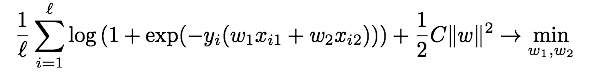

Здесь xi1 и xi2 — значение первого и второго признаков соответственно на объекте xi. В этом задании мы будем рассматривать алгоритмы без свободного члена, чтобы упростить работу.

Градиентный шаг для весов будет заключаться в одновременном обновлении весов w1 и w2 по следующим формулам (проверьте сами, что здесь действительно выписана производная нашего функционала):

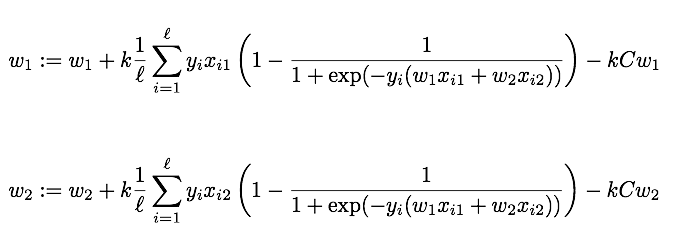

Здесь k — размер шага.

Линейные методы могут переобучаться и давать плохое качество из-за различных проблем в данных: мультиколлинеарности, зашумленности и т.д. Чтобы избежать этого, следует использовать регуляризацию — она позволяет понизить сложность модели и не допустить переобучения. Сила регуляризации определяется коэффициентом C в формулах, указанных выше.

### План работы
<ul>
 <li>работать с логистической регрессией</li>
 <li>реализовывать градиентный спуск для ее настройки</li>
    <li>использовать регуляризацию</li>
</ul>

### Подключение библиотек

In [17]:
from sklearn.metrics import (
    roc_auc_score, accuracy_score,
    precision_score, recall_score, f1_score
)

### Загрузка данных 

In [18]:
data = pd.read_csv('data/week_3_data-logistic.csv', header=None)

In [19]:
data.head()

,0,1,2
0,-1,-0.663827,-0.138526
1,1,1.994596,2.468025
2,-1,-1.247395,0.749425
3,1,2.309374,1.899836
4,1,0.849143,2.407750


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       205 non-null    int64  
 1   1       205 non-null    float64
 2   2       205 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.9 KB


### Описание данных

Сгенерированная выборка

Целевая переменная записана в первом столбце, признаки — во втором и третьем.

### Инструкции по выполнению
В этом задании мы предлагаем вам самостоятельно реализовать градиентный спуск.

В качестве метрики качества будем использовать AUC-ROC (Area Under ROC-Curve). Она предназначена для алгоритмов бинарной классификации, выдающих оценку принадлежности объекта к одному из классов. По сути, значение этой метрики является агрегацией показателей качества всех алгоритмов, которые можно получить, выбирая какой-либо порог для оценки принадлежности.

В Scikit-Learn метрика AUC реализована функцией sklearn.metrics.roc_auc_score. В качестве первого аргумента ей передается вектор истинных ответов, в качестве второго — вектор с оценками принадлежности объектов к первому классу.

#### 1. Загрузите данные из файла data-logistic.csv. Это двумерная выборка, целевая переменная на которой принимает значения -1 или 1.

In [21]:
y = data[0] 
X = data[[1,2]]

#### 2. Реализуйте градиентный спуск для обычной и L2-регуляризованной (с коэффициентом регуляризации 10) логистической регрессии. 
Используйте длину шага k=0.1. В качестве начального приближения используйте вектор (0, 0).

In [22]:
def dist(x, y):
    return np.sqrt(np.sum((x-y)**2))

In [23]:
def sigma(X, y, w):
    return 1.0 - 1.0/(1.0 + np.exp(-y*(w[0]*X[1] + w[1]*X[2])))

In [24]:
def GD(X, y, w, k=0, C=0):
    l = y.shape[0]
    w1_new = w[0] + k*np.mean(y*X[1]*sigma(X, y, w)) - k*C*w[0]
    w2_new = w[1] + k*np.mean(y*X[2]*sigma(X, y, w)) - k*C*w[1]
    return w1_new, w2_new

##### 3.Запустите градиентный спуск и доведите до сходимости 
(евклидово расстояние между векторами весов на соседних итерациях должно быть не больше 1e-5). Рекомендуется ограничить сверху число итераций десятью тысячами.

In [25]:
def log_reg(X, y, init, k=0, C=0):
    w = np.array(init, dtype=float)
    w_n = np.array(init, dtype=float)
    c=0
    while(c<=10000):
        w_n[0], w_n[1] = GD(X, y, w, k, C)
        evkd = dist(w, w_n)
        if evkd <= 1e-5:
            print(c)
            break
        w = w_n.copy()
        c+=1
    return w

In [26]:
def sigmoid(X, w):
    return 1/(1+np.exp(-np.sum(w*X, axis=1)))

##### 4. Какое значение принимает AUC-ROC на обучении без регуляризации и при ее использовании?

In [27]:
y_test = sigmoid(X, log_reg(X, y, [0,0], 0.1, 10))
y_test2 = sigmoid(X, log_reg(X, y, [0,0], 0.1))

7
243


##### 5. Попробуйте поменять длину шага. Будет ли сходиться алгоритм, если делать более длинные шаги? Как меняется число итераций при уменьшении длины шага?

In [28]:
for i in np.power(10.0, np.arange(-5,0)):
    print(f"k = {i}")
    y_test = sigmoid(X, log_reg(X, y,[0,0], i, 10))

k = 1e-05
0
k = 0.0001
1232
k = 0.001
304
k = 0.01
46
k = 0.1
7


Чем меньше длина шага тем точнее сходимость,но больше количество шагов

## Метрики качества классификации

### Введение
В задачах классификации может быть много особенностей, влияющих на подсчет качества: различные цены ошибок, несбалансированность классов и т.д. Из-за этого существует большое количество метрик качества — каждая из них рассчитана на определенное сочетание свойств задачи и требований к ее решению.

Меры качества классификации можно разбить на две большие группы: предназначенные для алгоритмов, выдающих номера классов, и для алгоритмов, выдающих оценки принадлежности к классам. К первой группе относятся доля правильных ответов, точность, полнота, F-мера. Ко второй — площади под ROC- или PR-кривой.

### План работы
<ul>
 <li>вычислять различные меры качества классификации: долю правильных ответов, точность, полноту, AUC-ROC и т.д.</li>
 <li>сравнивать алгоритмы классификации при наличии ограничений на точность или полноту</li>
</ul>

### Подключение библиотек

In [29]:
from sklearn.metrics import (accuracy_score, recall_score,
f1_score, precision_score, roc_auc_score, precision_recall_curve)

### Загрузка данных 

In [30]:
data = pd.read_csv('data/week_3_classification.csv')

In [31]:
data.head()

,true,pred
0,1,0
1,1,1
2,1,1
3,0,0
4,1,1


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   true    200 non-null    int64
 1   pred    200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


### Описание данных

Сгенерированная выборка

Целевая переменная записана в первом столбце, признаки — во втором и третьем.

### Инструкции по выполнению
Различные метрики качества реализованы в пакете sklearn.metrics. Конкретные функции указаны в инструкции по выполнению задания.

#### 1. Загрузите файл classification.csv. В нем записаны истинные классы объектов выборки (колонка true) и ответы некоторого классификатора (колонка pred). Заполните таблицу ошибок классификации:

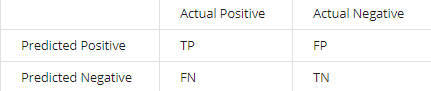

Для этого подсчитайте величины TP, FP, FN и TN согласно их определениям. Например, FP — это количество объектов, имеющих класс 0, но отнесенных алгоритмом к классу 1. Ответ в данном вопросе — четыре числа через пробел.

In [33]:
TP = np.sum(data['true']*data['pred'])
FP = np.sum((data['true']==0)&(data['true']!=data['pred']))
TN = np.sum((data['true']+data['pred'])==0)
FN = 200 - TP - FP - TN
EM = pd.DataFrame({"Actual positive": [TP, FN], 'Actual Negative': [FP, TN]},
                     index=['Predicted Positive', 'Predicted Negative'])

#### 3. Посчитайте основные метрики качества классификатора:

Accuracy (доля верно угаданных) — sklearn.metrics.accuracy_score
Precision (точность) — sklearn.metrics.precision_score
Recall (полнота) — sklearn.metrics.recall_score
F-мера — sklearn.metrics.f1_score
В качестве ответа укажите эти четыре числа через пробел..

In [34]:
print(f"Accuracy score = {accuracy_score(data['true'], data['pred'])}")

print(f"Precision score = {precision_score(data['true'], data['pred'])}")

print(f"Recall score = {recall_score(data['true'], data['pred'])}")

print(f"F1 score = {f1_score(data['true'], data['pred'])}")

Accuracy score = 0.535
Precision score = 0.5584415584415584
Recall score = 0.4215686274509804
F1 score = 0.48044692737430167


#### 4. Имеется четыре обученных классификатора. В файле scores.csv записаны истинные классы и значения степени принадлежности положительному классу для каждого классификатора на некоторой выборке:

для логистической регрессии — вероятность положительного класса (колонка score_logreg),
для SVM — отступ от разделяющей поверхности (колонка score_svm),
для метрического алгоритма — взвешенная сумма классов соседей (колонка score_knn),
для решающего дерева — доля положительных объектов в листе (колонка score_tree).

In [35]:
valid = pd.read_csv('data/week_3_scores.csv')
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   true          200 non-null    int64  
 1   score_logreg  200 non-null    float64
 2   score_svm     200 non-null    float64
 3   score_knn     200 non-null    float64
 4   score_tree    200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [36]:
valid.head()

,true,score_logreg,score_svm,score_knn,score_tree
0,0,0.683832,0.145976,0.787063,0.500000
1,1,0.801966,0.239511,1.000000,0.833333
2,0,0.382315,-0.245701,0.000000,0.000000
3,1,0.506797,-0.137058,0.000000,0.105263
4,1,0.488781,-0.154148,0.000000,0.105263


In [37]:
y = valid['true']

X = valid.drop('true', axis=1)

#### 5. Посчитайте площадь под ROC-кривой для каждого классификатора. Какой классификатор имеет наибольшее значение метрики AUC-ROC (укажите название столбца)? Воспользуйтесь функцией sklearn.metrics.roc_auc_score.

In [38]:
for c in X.columns:
    print(f"For {c} - ROC = {roc_auc_score(y, X[c])}")

For score_logreg - ROC = 0.719187675070028
For score_svm - ROC = 0.7086834733893557
For score_knn - ROC = 0.6351540616246498
For score_tree - ROC = 0.6919267707082833


#### 6. Какой классификатор достигает наибольшей точности (Precision) при полноте (Recall) не менее 70% ?
Чтобы получить ответ на этот вопрос, найдите все точки precision-recall-кривой с помощью функции sklearn.metrics.precision_recall_curve. Она возвращает три массива: precision, recall, thresholds. В них записаны точность и полнота при определенных порогах, указанных в массиве thresholds. Найдите максимальной значение точности среди тех записей, для которых полнота не меньше, чем 0.7.

In [39]:
for c in X.columns:
    m = precision_recall_curve(y, valid[c]) 
    test = pd.DataFrame({'Precision': m[0], 'Recall':m[1]})
    print(c, test[test['Recall']>0.7]['Precision'].max())


score_logreg 0.6302521008403361
score_svm 0.6228070175438597
score_knn 0.6065573770491803
score_tree 0.6517857142857143
